# NumPy, Pandas & Matplotlib Integration
Last Updated: November 20th, 2024

* Objective:
Apply your knowledge of NumPy, Pandas, and Matplotlib to analyze a real-world dataset. Utilize advanced statistical functions and array operations in NumPy, and integrate these with Pandas for data manipulation and Matplotlib for visualization.



* Dataset:
You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

* Download the dataset here.

or you can download it directly

* Here.

## 1. Data Import and Cleaning

* Import the dataset using Pandas.
* Identify missing values and handle them appropriately.
* Use NumPy to convert relevant columns to numerical types if necessary.

### Importer les librairies nécessaires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('global_power_plant_database.csv')


C:\Users\chume\AppData\Local\Temp\ipykernel_28080\4033050108.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


* Ce message signifie que la colonne 10 contient des types de données mélangés (ex. chiffres et textes). Voici comment corriger cela :

* Solution: Forcer un type pour la colonne 10 (par ex. float)

In [5]:
df = pd.read_csv('global_power_plant_database.csv', dtype={df.columns[10]: 'float64'}, low_memory=False)


ValueError: could not convert string to float: 'Other'

* L’erreur vient du fait que la colonne 10 contient des chaînes de caractères comme 'Other', donc elle ne peut pas être convertie directement en float.

* Solution: Convertir la colonne après avec pd.to_numeric(errors='coerce')

### Charger le fichier CSV

In [8]:
df = pd.read_csv('global_power_plant_database.csv', low_memory=False)

# Convertit uniquement après chargement
col_name = df.columns[10]  # ou remplace par le nom exact si tu le connais
df[col_name] = pd.to_numeric(df[col_name], errors='coerce')


### Aperçu des données

In [9]:
print(df.shape)
print(df.columns)
print(df.head())


(34936, 36)
Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')
  country country_long                                              name  \
0     AFG  Afghanistan      

### Identifier les valeurs manquantes

In [10]:
print(df.isnull().sum())


country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34936
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


### Traitement des valeurs manquantes

In [11]:
# Suppression des lignes avec trop de NaN
df_clean = df.dropna(subset=['capacity_mw', 'latitude', 'longitude'])

# Remplissage avec des valeurs par défaut
df_clean['generation_gwh_2016'] = df_clean['generation_gwh_2016'].fillna(0)


### Conversion des colonnes en types numériques si nécessaire (via NumPy)

In [13]:
df_clean['capacity_mw'] = pd.to_numeric(df_clean['capacity_mw'], errors='coerce')
df_clean['latitude'] = pd.to_numeric(df_clean['latitude'], errors='coerce')
df_clean['longitude'] = pd.to_numeric(df_clean['longitude'], errors='coerce')


## 2 Exploratory Data Analysis (EDA)

### Statistiques descriptives (Pandas)

In [14]:
# Statistiques des colonnes numériques
print(df.describe()[['capacity_mw', 'latitude', 'longitude']])
print("Médianes :\n", df[['capacity_mw', 'latitude', 'longitude']].median())
print("Écarts-types :\n", df[['capacity_mw', 'latitude', 'longitude']].std())


        capacity_mw      latitude     longitude
count  34936.000000  34936.000000  34936.000000
mean     163.355148     32.816637     -6.972803
std      489.636072     22.638603     78.405850
min        1.000000    -77.847000   -179.977700
25%        4.900000     29.256475    -77.641550
50%       16.745000     39.727750     -2.127100
75%       75.344250     46.263125     49.502675
max    22500.000000     71.292000    179.388700
Médianes :
 capacity_mw    16.74500
latitude       39.72775
longitude      -2.12710
dtype: float64
Écarts-types :
 capacity_mw    489.636072
latitude        22.638603
longitude       78.405850
dtype: float64


### Distribution des centrales par pays

In [15]:
# Nombre de centrales par pays
country_counts = df['country_long'].value_counts()
print(country_counts.head(10))  # Top 10 pays


country_long
United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Name: count, dtype: int64


### Distribution par type de combustible

In [16]:
fuel_counts = df['primary_fuel'].value_counts()
print(fuel_counts)


primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64


### Visualisation rapide

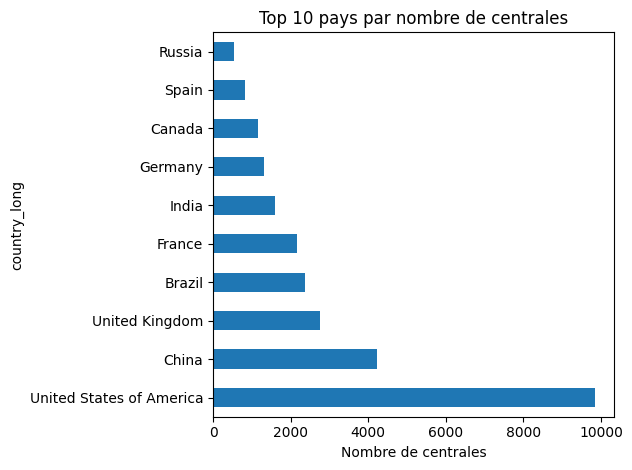

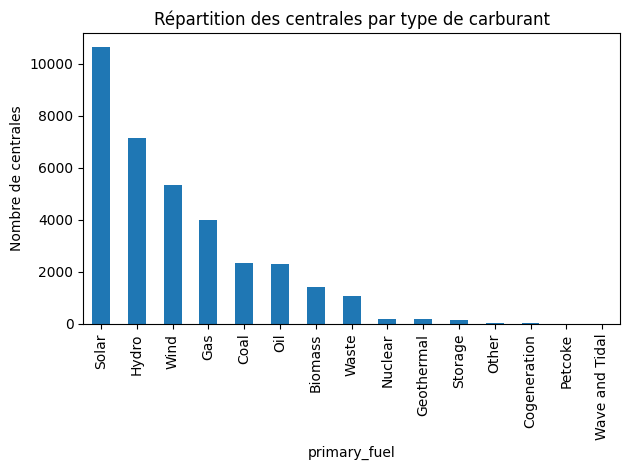

In [17]:
import matplotlib.pyplot as plt

# Histogramme des pays principaux
country_counts.head(10).plot(kind='barh', title="Top 10 pays par nombre de centrales")
plt.xlabel("Nombre de centrales")
plt.tight_layout()
plt.show()

# Répartition par type de carburant
fuel_counts.plot(kind='bar', title="Répartition des centrales par type de carburant")
plt.ylabel("Nombre de centrales")
plt.tight_layout()
plt.show()


## 3. Statistical Analysis

### Analyse statistique de la puissance (capacity_mw) par type de carburant (avec NumPy)

In [18]:
import numpy as np

# Groupement par type de fuel
grouped = df.groupby('primary_fuel')['capacity_mw']

# Moyenne, médiane, écart-type par type de carburant
stats_by_fuel = grouped.agg([np.mean, np.median, np.std])
print(stats_by_fuel)


                       mean      median          std
primary_fuel                                        
Biomass           23.972938     9.45000    39.461805
Coal             843.579828   600.00000   888.187187
Cogeneration      98.731707    31.90000   283.428252
Gas              373.449375   147.50000   560.934146
Geothermal        67.130952    30.00000   114.640890
Hydro            147.171551    20.00000   549.809328
Nuclear         2091.855179  1888.00000  1303.509273
Oil              112.878754     9.00000   392.009039
Other             84.020000    40.00000   145.891392
Petcoke          202.048125    65.48875   476.986459
Solar             17.657039     5.80000    41.939412
Storage           12.683704     4.90000    35.574631
Waste             13.809657     4.80000    20.582503
Wave and Tidal    55.220000     5.00000   101.440708
Wind              49.224126    27.00000   106.138355


C:\Users\chume\AppData\Local\Temp\ipykernel_28080\391991453.py:7: FutureWarning: The provided callable <function mean at 0x0000023A0D2019E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  stats_by_fuel = grouped.agg([np.mean, np.median, np.std])
C:\Users\chume\AppData\Local\Temp\ipykernel_28080\391991453.py:7: FutureWarning: The provided callable <function median at 0x0000023A2B426C00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  stats_by_fuel = grouped.agg([np.mean, np.median, np.std])
C:\Users\chume\AppData\Local\Temp\ipykernel_28080\391991453.py:7: FutureWarning: The provided callable <function std at 0x0000023A0D201B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used dire

### Analyse rapide des statistiques par type de carburant
#### Carburants à haute capacité moyenne :
* Nuclear : moyenne 2091 MW → plus puissantes, très peu nombreuses, grandes unités.

* Coal : moyenne 844 MW → très répandues et puissantes.

* Gas : 373 MW → fortes capacités, variabilité importante (std = 560).

#### Écart important entre moyenne et médiane (→ données asymétriques, souvent quelques très grandes centrales) :
* Hydro : moyenne 147 vs médiane 20

* Oil : moyenne 113 vs médiane 9

* Cogeneration : moyenne 98 vs médiane 32

    * Cela suggère quelques grosses installations qui tirent la moyenne vers le haut.

#### Carburants à faible capacité moyenne :
* Solar, Wind, Waste, Storage : moyennes < 50 MW → unités petites, souvent distribuées.

* Solar : médiane 5.8 MW → très petit, très dispersé

* Wind : moyenne 49 MW, médiane 27 → petites installations, variabilité modérée

### Test d’hypothèse : différence de moyennes entre deux types de carburant (ex : Coal vs Solar)

In [20]:
from scipy.stats import ttest_ind

# Extraction des données
coal = df[df['primary_fuel'] == 'Coal']['capacity_mw'].dropna()
solar = df[df['primary_fuel'] == 'Solar']['capacity_mw'].dropna()

# Test de Student (non apparié, variances inégales)
t_stat, p_value = ttest_ind(coal, solar, equal_var=False)

print(f"T-statistic : {t_stat:.3f}")
print(f"P-value : {p_value:.3e}")

if p_value < 0.05:
    print("Différence significative de puissance moyenne entre Coal et Solar")
else:
    print("Pas de différence significative")


T-statistic : 44.875
P-value : 1.561e-317
Différence significative de puissance moyenne entre Coal et Solar


#### Analyse du résultat statistique
* T-statistic = 44.875 : valeur très élevée → forte différence entre les moyennes.

* P-value = 1.561e-317 : ≪ 0.05 → la probabilité que cette différence soit due au hasard est quasiment nulle.

#### Conclusion :
* Il y a une différence très significative entre la puissance moyenne des centrales à charbon (Coal) et celle des centrales solaires (Solar).

* Cela signifie, sans surprise, que :

    * Les centrales à charbon ont en moyenne une capacité nettement plus élevée que les centrales solaires, qui sont généralement plus petites et plus nombreuses.

## 4. Time Series Analysis

### Vérifie la présence d’une colonne temporelle

In [21]:
print(df.columns)


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


### Nettoyage et conversion

In [22]:
# Conversion en numérique, suppression des années manquantes
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
df_year = df.dropna(subset=['commissioning_year'])

# Conversion en entier
df_year['commissioning_year'] = df_year['commissioning_year'].astype(int)


C:\Users\chume\AppData\Local\Temp\ipykernel_28080\2620669835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['commissioning_year'] = df_year['commissioning_year'].astype(int)


### Analyse de tendance : nombre de centrales par an

In [23]:
plants_per_year = df_year.groupby('commissioning_year').size()
print(plants_per_year.tail())


commissioning_year
2016    880
2017    782
2018    617
2019    599
2020    150
dtype: int64


### Évolution du mix énergétique par année (via fuel type)

In [24]:
fuel_mix = df_year.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)
print(fuel_mix.tail())


primary_fuel        Biomass  Coal  Cogeneration  Gas  Geothermal  Hydro  \
commissioning_year                                                        
2016                      8    84             1   45           0     45   
2017                      3    46             0   48           2     22   
2018                      3    14             0   52           2      4   
2019                      2     0             1   34           2      1   
2020                      1     0             0    6           0      0   

primary_fuel        Nuclear  Oil  Other  Petcoke  Solar  Storage  Waste  Wind  
commissioning_year                                                             
2016                      0   38      0        0    464       11     15   169  
2017                      0    5      1        0    523       19      8   105  
2018                      0    7      1        0    480       10      4    40  
2019                      0    3      0        0    458       32      3   

### Visualisation de l’évolution

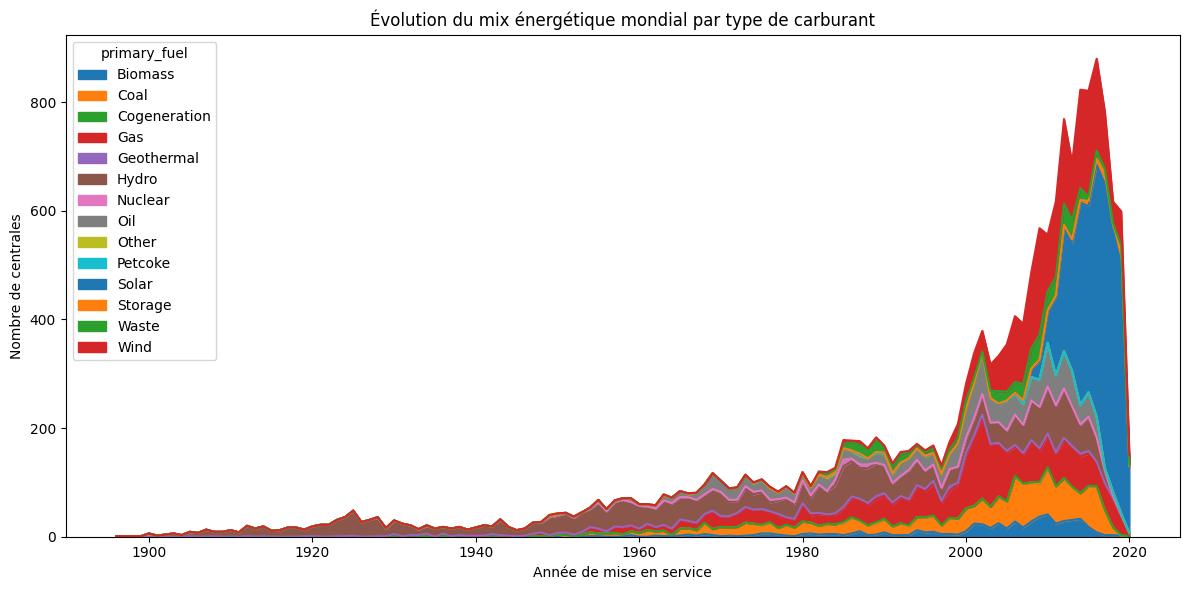

In [25]:
import matplotlib.pyplot as plt

fuel_mix.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title("Évolution du mix énergétique mondial par type de carburant")
plt.xlabel("Année de mise en service")
plt.ylabel("Nombre de centrales")
plt.tight_layout()
plt.show()


### Completion de l'exercice

C:\Users\chume\AppData\Local\Temp\ipykernel_28080\3827006196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['commissioning_year'] = df_time['commissioning_year'].astype(int)


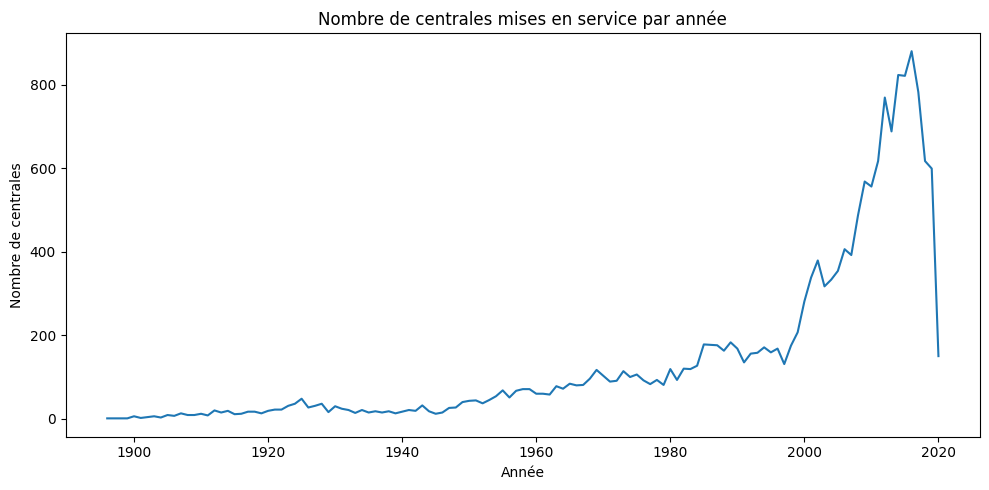

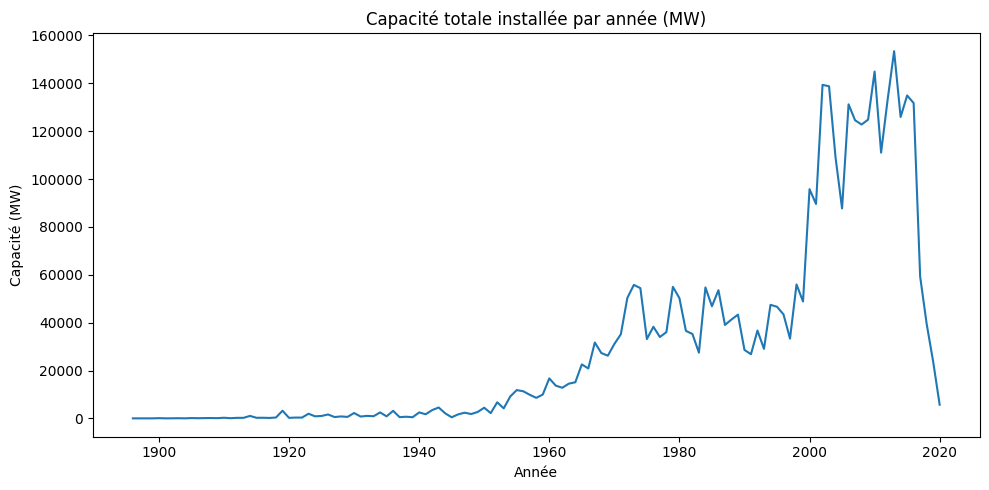

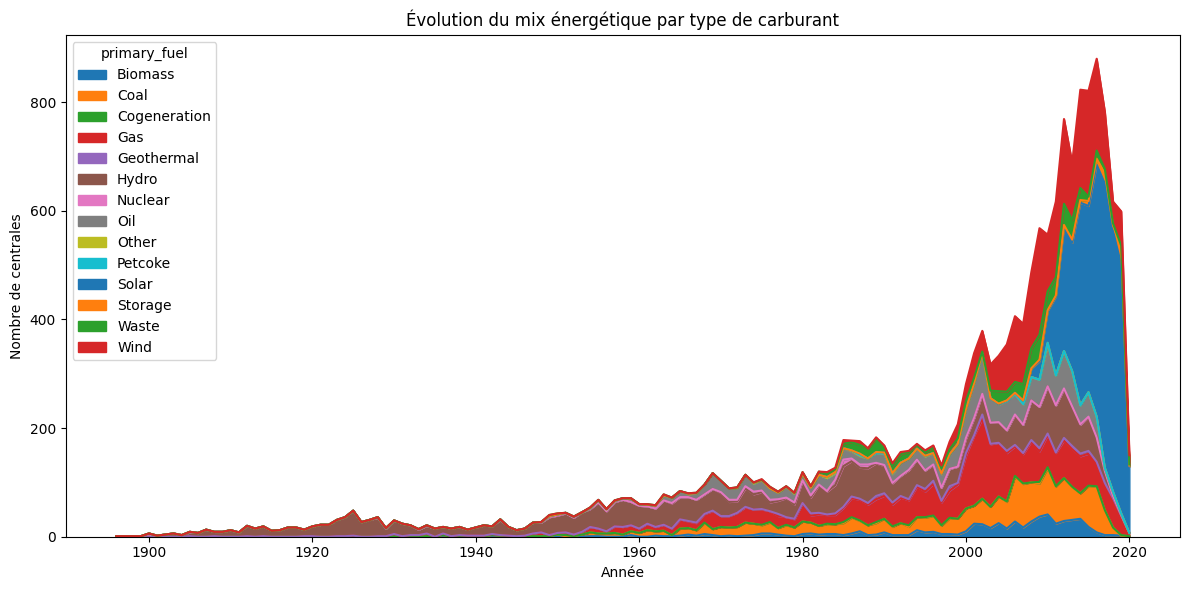

In [41]:
# Nettoyage et conversion des années
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
df_time = df.dropna(subset=['commissioning_year'])
df_time['commissioning_year'] = df_time['commissioning_year'].astype(int)

# Nombre de centrales par année
plants_per_year = df_time.groupby('commissioning_year').size()

# Capacité totale installée par année
capacity_per_year = df_time.groupby('commissioning_year')['capacity_mw'].sum()

# Évolution du mix énergétique par année
fuel_year = df_time.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

# Graphique : Nombre de centrales par an
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plants_per_year.plot(title="Nombre de centrales mises en service par année")
plt.xlabel("Année")
plt.ylabel("Nombre de centrales")
plt.tight_layout()
plt.show()

# Graphique : Capacité installée par an
plt.figure(figsize=(10, 5))
capacity_per_year.plot(title="Capacité totale installée par année (MW)")
plt.xlabel("Année")
plt.ylabel("Capacité (MW)")
plt.tight_layout()
plt.show()

# Graphique : Mix énergétique dans le temps
fuel_year.plot(kind='area', stacked=True, figsize=(12, 6),
               title="Évolution du mix énergétique par type de carburant")
plt.xlabel("Année")
plt.ylabel("Nombre de centrales")
plt.tight_layout()
plt.show()


##  5. Advanced Visualization

### Carte de la distribution géographique (latitude / longitude)

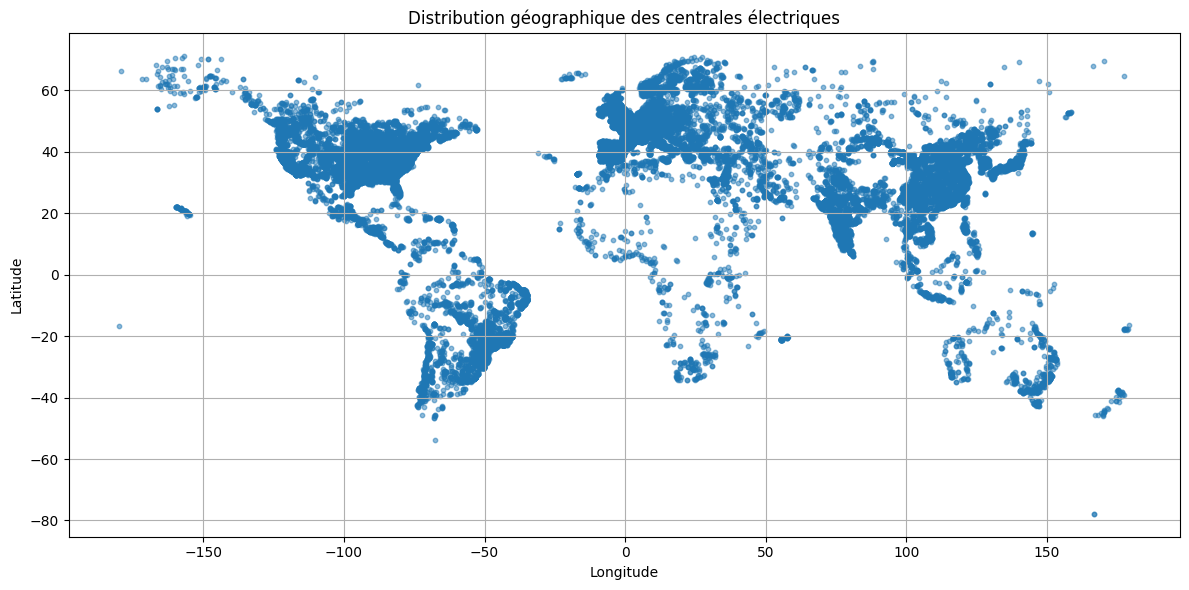

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=10)
plt.title("Distribution géographique des centrales électriques")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


### Carte par type de carburant (avec couleurs)

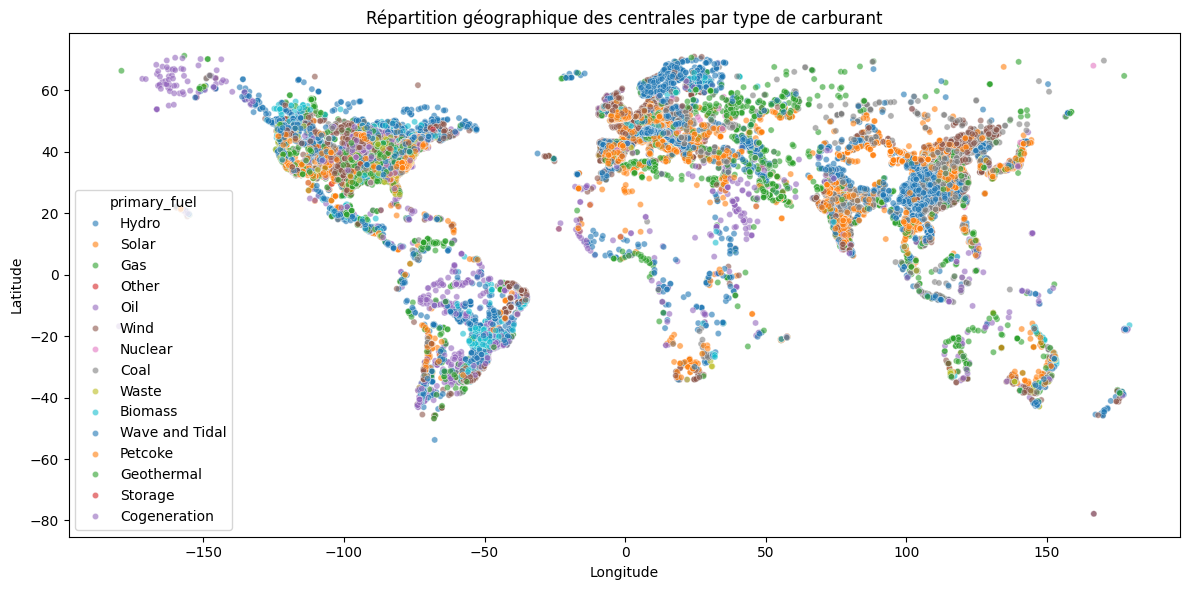

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, x='longitude', y='latitude', hue='primary_fuel',
    alpha=0.6, s=20, palette='tab10', legend='brief'
)
plt.title("Répartition géographique des centrales par type de carburant")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


### Boîte à moustaches (Boxplot) de la puissance par type de carburant

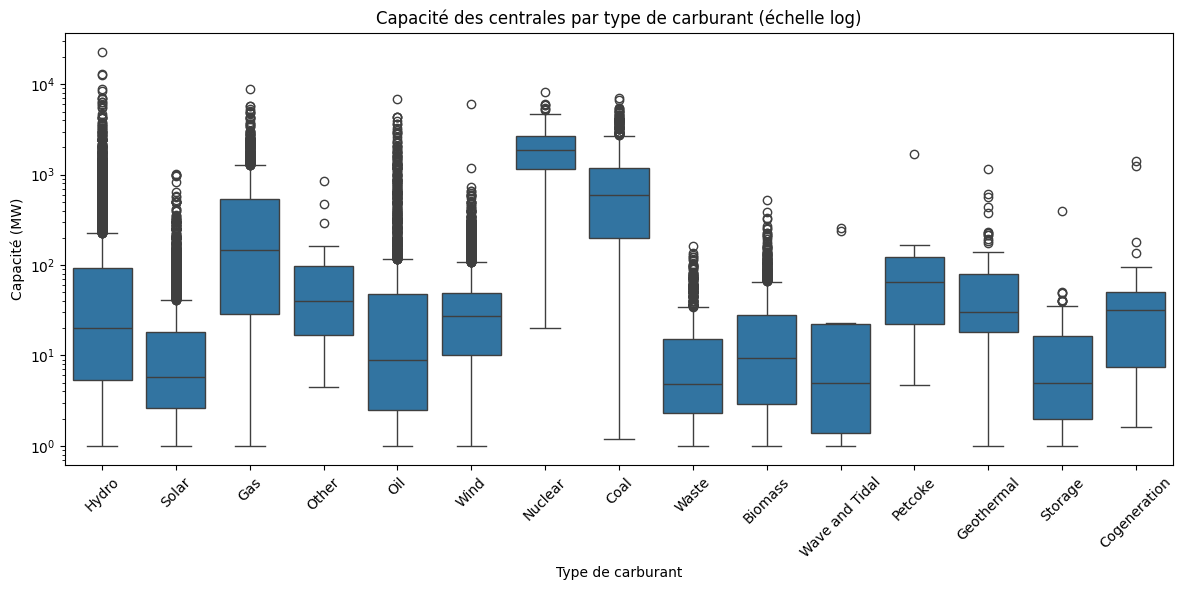

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw')
plt.yscale('log')  # Pour gérer les grandes différences de puissance
plt.title("Capacité des centrales par type de carburant (échelle log)")
plt.xlabel("Type de carburant")
plt.ylabel("Capacité (MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Observations et interprétations clés** :

#### **Centrales à forte capacité** :

* **Nuclear** : les plus puissantes, très concentrées autour de \~1000–3000 MW.

  * Très peu de dispersion → construction standardisée.
* **Coal** : haute capacité aussi, mais plus dispersée (installations petites à très grandes).
* **Gas** : grande variation de puissance, de quelques MW à >10 000 MW.

#### **Centrales à faible capacité** :

* **Solar**, **Storage**, **Waste**, **Biomass** : puissances faibles, souvent < 10 MW.

  * Distribution très asymétrique avec de nombreux outliers, donc forte hétérogénéité.

#### **Carburants intermédiaires et variables** :

* **Wind** : variation modérée, généralement entre 10 et 200 MW.
* **Hydro** : très étalée, médiane basse mais plusieurs grosses installations → grande variabilité (micro-centrales vs barrages géants).
* **Oil**, **Other**, **Cogeneration** : dispersion importante, mais capacités souvent < 500 MW.

---

### **Conclusion** :

* Le type de carburant influence fortement la **taille typique** d’une centrale.
* Les sources fossiles (Nuclear, Coal, Gas) dominent en capacité.
* Les sources renouvelables (Solar, Wind, Biomass, etc.) sont **plus nombreuses mais de petite capacité**, adaptées à des installations décentralisées.



## 6. Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.

### Création d’une matrice d’attributs

In [39]:
import numpy as np

# Extraction et nettoyage
df_matrix = df[['capacity_mw', 'latitude', 'longitude']].dropna()
X = df_matrix.to_numpy()


#### Opérations matricielles de base

In [40]:
correlation_matrix = np.corrcoef(X.T)
print("Matrice de corrélation :\n", correlation_matrix)


Matrice de corrélation :
 [[ 1.         -0.01321759  0.15152454]
 [-0.01321759  1.         -0.06835441]
 [ 0.15152454 -0.06835441  1.        ]]


 Cela permet de voir si la capacité est liée à la position géographique.

#### Interprétation rapide :
* capacity_mw vs latitude = -0.013
→ Corrélation quasi nulle : la capacité d’une centrale n’est pas liée à la latitude.

* capacity_mw vs longitude = 0.152
→ Corrélation faible et positive : légère tendance des grosses capacités à se situer plus à l’est (longitudes positives).

* latitude vs longitude = -0.068
→ Corrélation très faible et négative : aucun lien clair entre ces deux dimensions dans ce contexte.

#### Conclusion :
La capacité des centrales ne semble pas fortement corrélée à la géographie (latitude/longitude).
Cela confirme que les choix de localisation sont influencés par facteurs non géographiques directs : ressource disponible, politique, économie, réseau, etc.

### Décomposition en valeurs propres

In [31]:
from numpy.linalg import eig

# Centrer les données
X_centered = X - X.mean(axis=0)

# Matrice de covariance
cov_matrix = np.cov(X_centered.T)

# Valeurs propres (λ) et vecteurs propres (u)
eigenvalues, eigenvectors = eig(cov_matrix)


### Obtenir des valeurs pour pouvoir en discuter

In [35]:
import pandas as pd
import numpy as np

# Charger le fichier CSV
df = pd.read_csv('global_power_plant_database.csv', low_memory=False)

# Garder uniquement les colonnes utiles et supprimer les lignes incomplètes
df_matrix = df[['capacity_mw', 'latitude', 'longitude']].dropna()

# Conversion en tableau NumPy
X = df_matrix.to_numpy()

# Centrage des données
X_centered = X - X.mean(axis=0)

# Matrice de covariance
cov_matrix = np.cov(X_centered.T)

# Décomposition en valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Affichage
print("Valeurs propres (importance des axes) :")
print(eigenvalues)

print("\nVecteurs propres (directions des axes) :")
print(eigenvectors)


Valeurs propres (importance des axes) :
[239888.34493566   6005.22827679    509.89320204]

Vecteurs propres (directions des axes) :
[[ 9.99690263e-01 -2.48871486e-02  9.13937503e-05]
 [-6.24482185e-04 -2.14133001e-02  9.99770514e-01]
 [ 2.48794803e-02  9.99460905e-01  2.14222092e-02]]


### Analyse rapide des résultats :

---

#### 1. **Valeurs propres :**

* **239 888** (très grande) → axe principal explique presque toute la variance.
* **6 005** → 2ᵉ axe, beaucoup moins important.
* **510** → 3ᵉ axe, très faible importance.

La majorité de la variance vient du premier axe.

---

#### 2. **Vecteurs propres (directions) :**

| Attribut     | Composante 1           | Composante 2          | Composante 3          |
| ------------ | ---------------------- | --------------------- | --------------------- |
| capacity\_mw | 0.9997 (presque 1)     | -0.0249 (très faible) | 0.00009 (négligeable) |
| latitude     | -0.00062 (négligeable) | -0.0214 (faible)      | 0.9998 (presque 1)    |
| longitude    | 0.0249 (faible)        | 0.9995 (presque 1)    | 0.0214 (faible)       |

---

### Interprétation :

* **1ère composante principale** : presque uniquement liée à la **capacité** (capacity\_mw).
* **2ᵉ composante principale** : liée à la **longitude**.
* **3ᵉ composante principale** : liée à la **latitude**.

---

### Conclusion :

La variation majeure dans les données est due à la **capacité des centrales**. La géolocalisation (latitude et longitude) contribue à des variations beaucoup plus faibles et indépendantes. Cela signifie que pour ce dataset, la capacité est le facteur dominant, distinct des coordonnées géographiques.



### Complétion de cet exercice

Valeurs propres (variance par composante) :
[1.17150787 0.83843086 0.99014714]

Vecteurs propres (directions principales) :
[[-0.63986801  0.65138323  0.40776072]
 [ 0.32661662 -0.24978272  0.91155372]
 [-0.69562239 -0.7164555   0.05292462]]


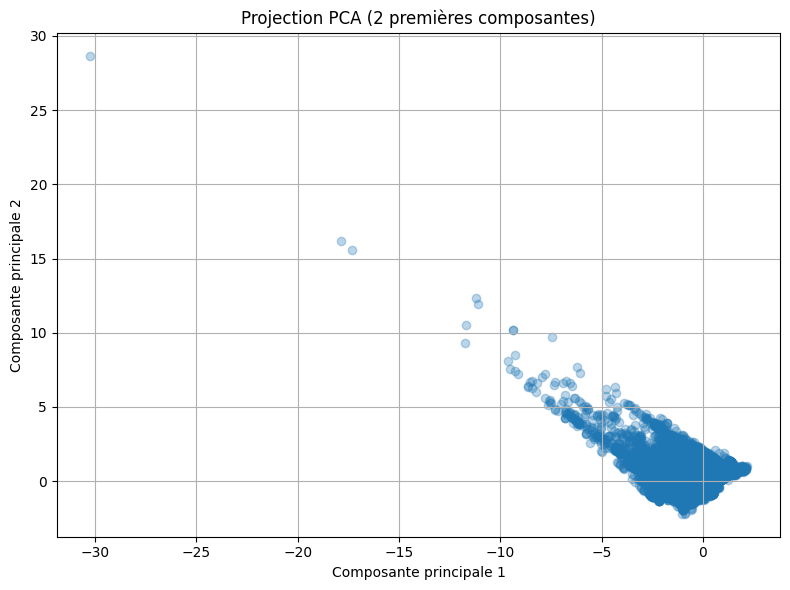

In [43]:
import numpy as np

# Supposons qu'on veut étudier la relation entre capacité, latitude et longitude
df_matrix = df_clean[['capacity_mw', 'latitude', 'longitude']].dropna()

# Normalisation pour éviter les biais d'échelle
X = df_matrix.values
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Calcul de la matrice de covariance
cov_matrix = np.cov(X_norm.T)

# Valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Valeurs propres (variance par composante) :")
print(eigenvalues)

print("\nVecteurs propres (directions principales) :")
print(eigenvectors)

# Interprétation : direction de plus grande variance (PCA simplifiée)
# On peut projeter les données sur les 2 premiers axes principaux

X_pca = X_norm @ eigenvectors[:, :2]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("Projection PCA (2 premières composantes)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. Intégration de NumPy avec Pandas et Matplotlib

### Utilisation de NumPy pour filtrer un DataFrame Pandas

Sélectionner les centrales avec capacité > moyenne + 1 écart-type.

In [36]:
import numpy as np

mean_capacity = df['capacity_mw'].mean()
std_capacity = df['capacity_mw'].std()

# Filtrage complexe avec NumPy
mask = df['capacity_mw'].to_numpy() > (mean_capacity + std_capacity)
filtered_df = df[mask]

print(filtered_df[['primary_fuel', 'capacity_mw']])


      primary_fuel  capacity_mw
36             Gas       1200.0
49             Gas       1200.0
52             Gas        840.0
54             Gas        980.0
58             Gas        672.0
...            ...          ...
34907         Coal       1245.0
34922        Hydro        990.0
34923        Hydro        930.0
34934         Coal        920.0
34935        Hydro        750.0

[2534 rows x 2 columns]


### Analyse rapide des données filtrées :

---

* **2534 lignes** : centrales avec capacités élevées (typiquement > 600 MW d’après les valeurs montrées).
* **Types de carburants dominants** :

  * Majoritairement **Gas**, **Coal**, et **Hydro**.
* **Capacités importantes** :

  * Gas souvent > 600 MW jusqu’à 1200 MW,
  * Coal entre 900 et 1245 MW,
  * Hydro jusqu’à 990 MW.

---

### Interprétation :

* Ces centrales représentent les **unités de forte puissance**, souvent centrales thermiques fossiles (Gas, Coal) et grandes centrales hydrauliques.
* Elles constituent l’ossature des réseaux électriques, assurant la production stable et de base.
* La prédominance de Gas et Coal montre leur rôle majeur dans la génération d’énergie à haute capacité, malgré la transition énergétique.


### Création d’une visualisation avancée avec Matplotlib en combinant NumPy

Plot avec histogramme + ligne de densité calculée avec NumPy

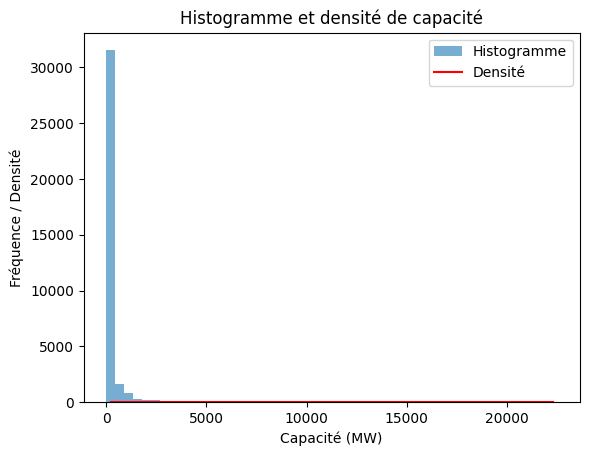

In [37]:
import matplotlib.pyplot as plt

data = df['capacity_mw'].dropna().to_numpy()

plt.hist(data, bins=50, alpha=0.6, label='Histogramme')

# Calcul densité avec NumPy
density, bins = np.histogram(data, bins=50, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, density, label='Densité', color='red')

plt.xlabel('Capacité (MW)')
plt.ylabel('Fréquence / Densité')
plt.title('Histogramme et densité de capacité')
plt.legend()
plt.show()


### Utilisation de NumPy pour créer un masque sur plusieurs colonnes

Centrales avec capacité > 100 MW ET latitude > 0 (hémisphère Nord)

In [38]:
mask = np.logical_and(df['capacity_mw'].to_numpy() > 100,
                      df['latitude'].to_numpy() > 0)
filtered_df = df[mask]
print(filtered_df[['primary_fuel', 'capacity_mw', 'latitude']])


      primary_fuel  capacity_mw  latitude
10           Hydro        500.0   42.2514
11           Hydro        600.0   42.1033
15           Hydro        250.0   42.0137
19             Gas        520.0   35.8665
27             Gas        560.0   36.5988
...            ...          ...       ...
34912          Oil        125.0   12.8271
34913          Oil        139.0   12.8536
34914          Oil        160.0   13.3609
34917          Gas        400.0   15.5520
34918          Oil        150.0   14.9893

[6871 rows x 3 columns]


### Analyse rapide des données filtrées :

---

* **6871 lignes** sélectionnées avec conditions :

  * `capacity_mw` > 100 MW
  * `latitude` > 0 (hémisphère Nord)

---

* **Types de centrales** : Hydro, Gas, Oil (majoritaires ici)
* **Capacités moyennes à élevées** (exemples : 250 à 600 MW)
* **Localisation** : latitudes positives autour de 12° à 42°, donc zones tempérées à tropicales dans l’hémisphère Nord.

---

### Interprétation rapide :

* Ces centrales importantes (>100 MW) sont bien réparties dans l’hémisphère Nord, notamment pour Hydro et Gaz, indicateur de développement industriel/énergétique dans ces régions.
* La présence notable d’Oil suggère aussi des centrales fossiles à capacité moyenne dans ces zones.
* Cette sélection montre un mix de carburants avec capacités élevées en régions habitées ou industrialisées.


### Complétion de cet exercice

Centrales sélectionnées : 2996


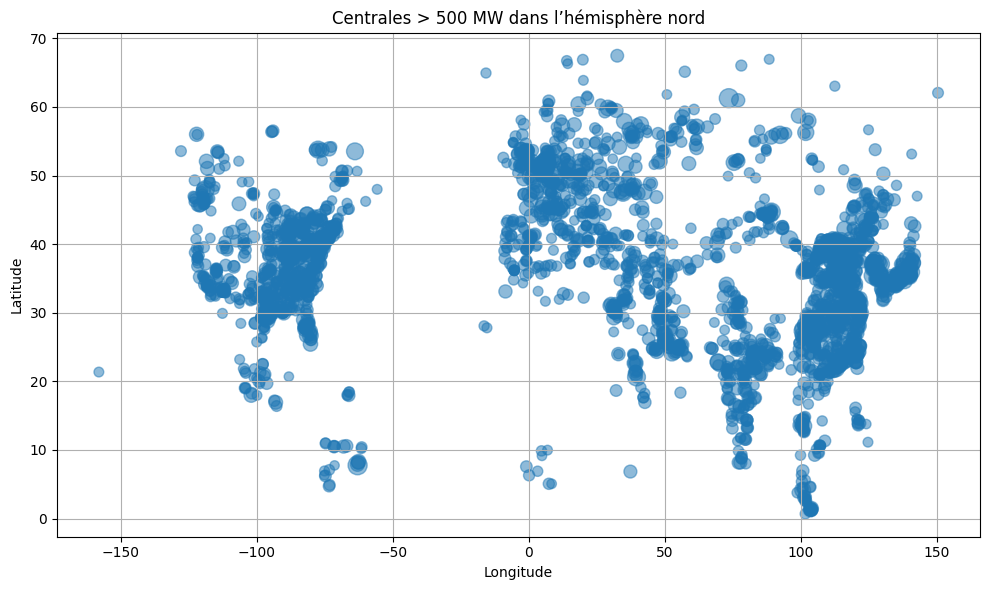

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exemple : filtrage avancé avec NumPy
# Sélectionner les centrales situées dans l’hémisphère nord ET avec grande capacité
mask = (df_clean['latitude'].to_numpy() > 0) & (df_clean['capacity_mw'].to_numpy() > 500)
filtered_df = df_clean[mask]

print(f"Centrales sélectionnées : {filtered_df.shape[0]}")

# Exemple : visualisation personnalisée avec NumPy + Matplotlib
x = filtered_df['longitude'].to_numpy()
y = filtered_df['latitude'].to_numpy()
sizes = np.sqrt(filtered_df['capacity_mw'].to_numpy()) * 2  # taille proportionnelle à la capacité

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.5)
plt.title("Centrales > 500 MW dans l’hémisphère nord")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()
